<a href="https://colab.research.google.com/github/upeast/Lee2/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

from six.moves import cPickle  # for data loading

data = cPickle.load(open('/content/binary_data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']

{'1': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0

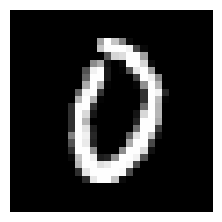

In [3]:
plt.figure(figsize = (12, 8))

plt.subplot(2,4,1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')






plt.show()

In [4]:
np.mean(data1[0])

np.float64(21.855867346938776)

In [6]:
np.mean(data0[0][10:20])

np.float64(49.214285714285715)

In [13]:
X0=np.mean(data0[:,10:20, 10:20], axis=(1,2))

In [10]:
X0.shape

(1000, 1)

In [14]:
X0=np.mean(data0[:,10:20, 10:20], axis=(1,2)).reshape(-1,1)
X0

array([[4.2860e+01],
       [6.4800e+01],
       [1.5548e+02],
       [1.2975e+02],
       [5.4700e+01],
       [3.6960e+01],
       [1.2566e+02],
       [0.0000e+00],
       [1.3674e+02],
       [9.9460e+01],
       [1.1239e+02],
       [1.1490e+01],
       [1.0670e+02],
       [4.7500e+00],
       [4.4740e+01],
       [2.8060e+01],
       [8.2690e+01],
       [1.3030e+01],
       [2.0640e+01],
       [1.2714e+02],
       [6.6030e+01],
       [3.8100e+00],
       [6.5800e+00],
       [1.2150e+01],
       [7.9220e+01],
       [1.4890e+01],
       [8.3930e+01],
       [6.1150e+01],
       [3.8000e-01],
       [2.0500e+00],
       [2.3660e+01],
       [2.3090e+01],
       [6.4090e+01],
       [3.7360e+01],
       [7.8100e+01],
       [8.0910e+01],
       [4.3990e+01],
       [4.0510e+01],
       [1.0864e+02],
       [1.1975e+02],
       [1.4960e+01],
       [2.1910e+01],
       [3.3190e+01],
       [1.2637e+02],
       [5.0590e+01],
       [2.2100e+01],
       [5.0160e+01],
       [2.365

In [15]:
X0.shape

(1000, 1)

In [17]:
X0=np.mean(data0,axis=(1,2)).reshape(-1,1)
X0

array([[39.6619898 ],
       [45.19515306],
       [46.56505102],
       [47.53316327],
       [58.09056122],
       [53.43367347],
       [58.98596939],
       [31.52040816],
       [53.91964286],
       [43.4119898 ],
       [47.13265306],
       [43.20663265],
       [48.11607143],
       [36.85969388],
       [51.66709184],
       [31.98086735],
       [54.89923469],
       [58.67857143],
       [34.78954082],
       [47.81632653],
       [40.2244898 ],
       [46.41326531],
       [49.3877551 ],
       [21.68622449],
       [34.94770408],
       [47.8125    ],
       [21.65433673],
       [34.90688776],
       [30.21938776],
       [44.05229592],
       [20.56632653],
       [55.39923469],
       [58.3877551 ],
       [39.25127551],
       [54.63010204],
       [42.28443878],
       [35.38010204],
       [42.59693878],
       [58.08545918],
       [63.03954082],
       [55.8622449 ],
       [46.69387755],
       [56.02423469],
       [47.19642857],
       [40.3494898 ],
       [53

위에 두개를 합치기

In [23]:
X0 = np.hstack([np.mean(data0[:,10:20, 10:20],axis = (1,2)).reshape(-1,1), np.mean(data0,axis=(1,2)).reshape(-1,1)])

In [24]:
X1 = np.hstack([np.mean(data1[:,10:20, 10:20],axis = (1,2)).reshape(-1,1), np.mean(data1,axis=(1,2)).reshape(-1,1)])

In [25]:
X = np.vstack([X1,X0])

In [30]:
X.shape

(2000, 2)

ValueError: x and y can be no greater than 2D, but have shapes (1000, 28, 28) and (1000, 28, 28)

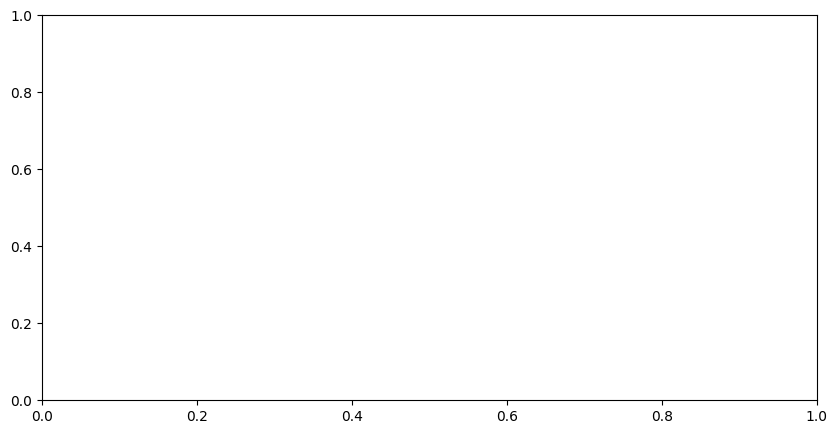

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(data1, data1, 'go', markersize=2, label='Digit 1')
plt.plot(data0, data0, 'bo', markersize=2, label='Digit 0')
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()